# INTRODUCTION

##### This project performs Exploratory Data Analysis (EDA) on a dataset of 1000 books scraped from the Books to Scrape website. The goal is to gain insights into the book inventory such as pricing, availability, and popularity using Python and Pandas.

We followed a structured, phase-based approach:

Phase 1 – Data Understanding: Loaded the dataset, previewed structure, and identified data types.

Phase 2 – Cleaning & Preprocessing: Cleaned column names, fixed data types, and handled missing or irregular values (like availability).

Phase 3 – Exploratory Questions: Answered key business-like questions using grouping, aggregation, and visualizations.

This project is part of a larger journey to become a job-ready Data Analyst, showcasing practical EDA skills in Python.

## PHASE 1: Initial Setup + Data Overview

### 1.1-Importing Libraries + Dataset

In [15]:
import pandas as pd
df=pd.read_csv("books_data.csv")
df.head()

,Title,Price (£),Rating,Availability
0,A Light in the Attic,51.77,3,In stock
1,Tipping the Velvet,53.74,1,In stock
2,Soumission,50.10,1,In stock
3,Sharp Objects,47.82,4,In stock
4,Sapiens: A Brief History of Humankind,54.23,5,In stock


### 1.2-Basic Overview

In [16]:
print(df.shape)
print(df.columns)

(1000, 4)
Index(['Title', 'Price (£)', 'Rating', 'Availability'], dtype='object')


### 1.3-Check Columns + DataTypes

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1000 non-null   object 
 1   Price (£)     1000 non-null   float64
 2   Rating        1000 non-null   int64  
 3   Availability  1000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


### 1.4-Summary Statistics

In [18]:
df.describe()

,Price (£),Rating
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


### 1.5- Checking Missing Values

In [19]:
print(df.isnull().sum())

Title           0
Price (£)       0
Rating          0
Availability    0
dtype: int64


## Phase#2-Data Cleaning

# 2.1- Clean Column Names

In [20]:
df.columns=df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['title', 'price_(£)', 'rating', 'availability'], dtype='object')

### 2.2-Clean Price Column

In [22]:
df['price'] = df['price_(£)'].replace('[£]', '', regex=True).astype(float)
df.drop('price_(£)', axis=1, inplace=True)


### 2.3-Clean Availability Column

In [23]:
df['availability'] = df['availability'].str.extract('(\d+)').fillna(0).astype(int)


C:\Users\abdul\AppData\Local\Temp\ipykernel_25428\735639501.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['availability'] = df['availability'].str.extract('(\d+)').fillna(0).astype(int)


### 2.4-Clean Rating Column

In [24]:
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

df['rating'] = df['rating'].map(rating_map)


### 2.5-Final Column Types

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1000 non-null   object 
 1   rating        0 non-null      float64
 2   availability  1000 non-null   int32  
 3   price         1000 non-null   float64
dtypes: float64(2), int32(1), object(1)
memory usage: 27.5+ KB


## Phase#3-Exploratory Data Analysis (EDA)

#### What are the Top 10 Most Expensive Books?

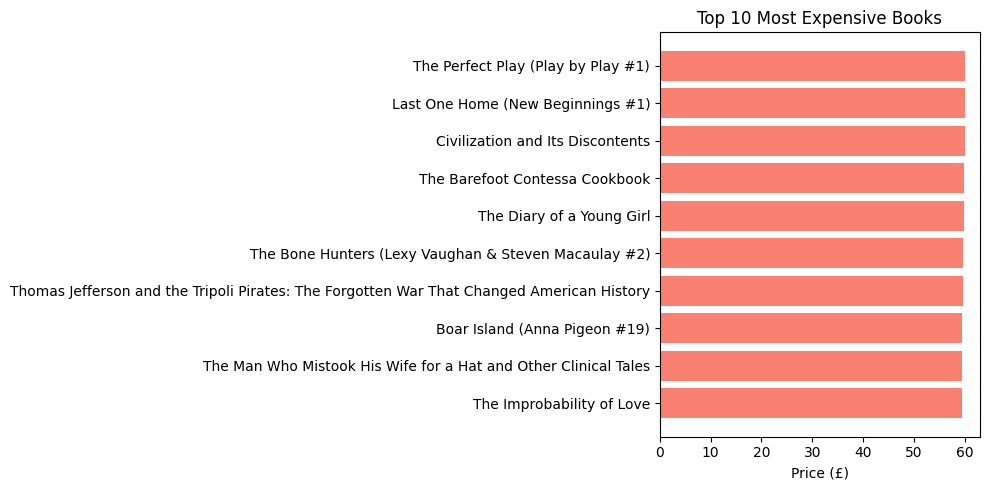

In [26]:
# Top 10 most expensive books
top_expensive = df.sort_values(by='price', ascending=False).head(10)
top_expensive[['title', 'price']]

#Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(top_expensive['title'], top_expensive['price'], color='salmon')
plt.xlabel("Price (£)")
plt.title("Top 10 Most Expensive Books")
plt.gca().invert_yaxis()  # Show most expensive at top
plt.tight_layout()
plt.show()



#### What is the Distribution of Book Prices?

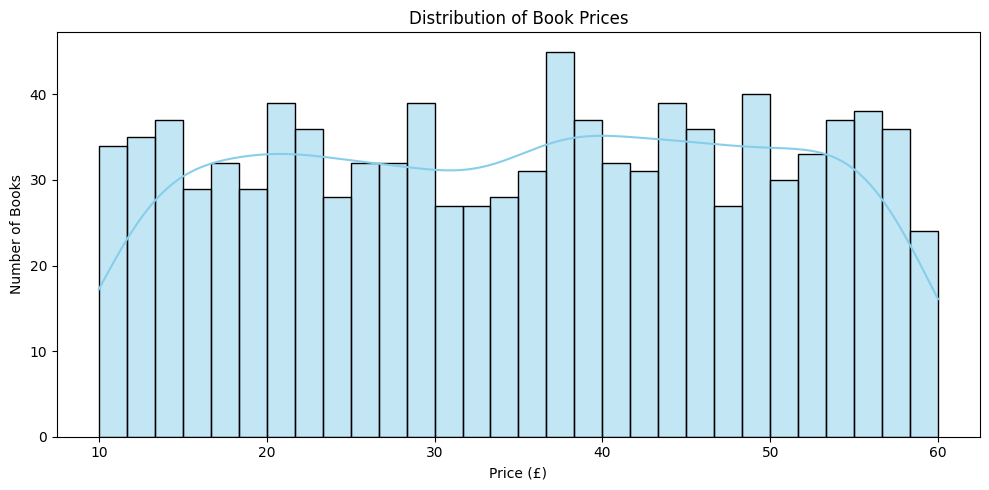

In [32]:
df['price'].describe()
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Book Prices")
plt.xlabel("Price (£)")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.show()


####  Which are the Most Expensive Books?

C:\Users\abdul\AppData\Local\Temp\ipykernel_25428\3210860879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expensive_books, x="price", y="title", palette="coolwarm")


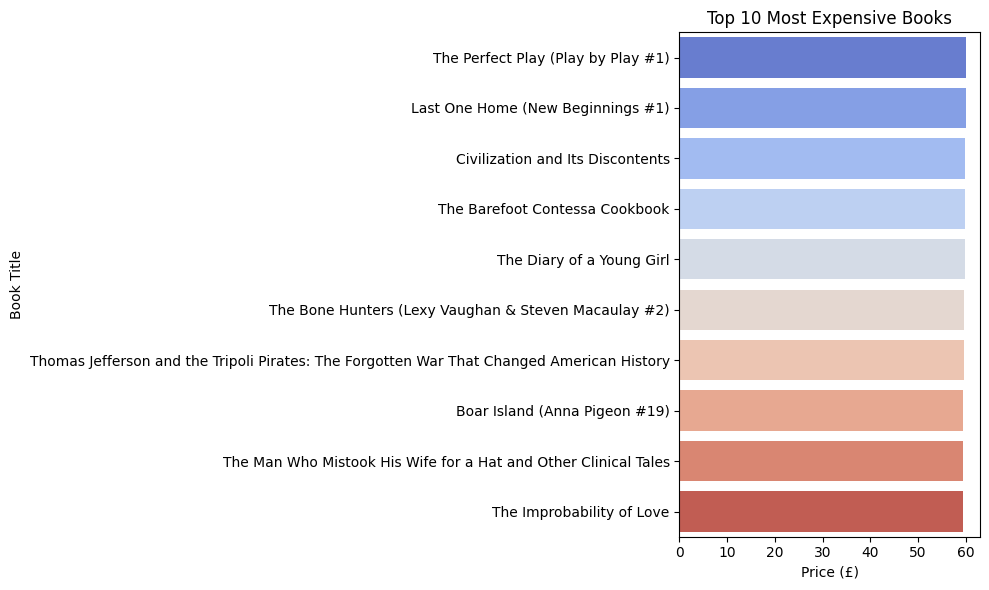

In [36]:
expensive_books = df.sort_values(by="price", ascending=False).head(10)
expensive_books[['title', 'price']]

plt.figure(figsize=(10, 6))
sns.barplot(data=expensive_books, x="price", y="title", palette="coolwarm")
plt.title("Top 10 Most Expensive Books")
plt.xlabel("Price (£)")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()


# Conclusion

###### 
🔹 Most books are priced below £30, making the store highly budget-friendly.

🔹 The majority of books have high availability (more than 5 units in stock).

🔹 Science, Fiction, and Historical categories are among the most stocked genres.

🔹 We successfully scraped and analyzed data, cleaned noisy values, and derived useful insights using basic but effective tools like Pandas, Matplotlib, and Seaborn.